In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
import unidecode
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
head={'Accept':'text/html,application/xhtml+xm…ml;q=0.9,image/webp,*/*;q=0.8'.encode('cp1252'),
'Accept-Encoding':'gzip, deflate, br'.encode('cp1252'),
'Accept-Language':'fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3'.encode('cp1252'),
'Connection':'keep-alive'.encode('cp1252'),
'Host':'www.amazon.fr'.encode('cp1252'),
'TE':'Trailers'.encode('cp1252'),
'Upgrade-Insecure-Requests':'1'.encode('cp1252'),
'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:74.0) Gecko/20100101 Firefox/74.0'.encode('cp1252')}


In [138]:
url = "https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews" 
r=requests.get(url, headers=head)
soup = BeautifulSoup(r.content,"html.parser")
print (r.status_code)
print (r.headers)

#base_url="https://www.amazon.fr"+soup.find('a', {'class': 'a-link-emphasis a-text-bold'})['href'] 

200
{'Server': 'Server', 'Content-Type': 'text/html;charset=UTF-8', 'Strict-Transport-Security': 'max-age=47474747; includeSubDomains; preload', 'Vary': 'Accept-Encoding,User-Agent,X-Amzn-CDN-Cache,X-Amzn-AX-Treatment', 'Content-Language': 'fr-FR', 'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Content-Encoding': 'gzip', 'X-XSS-Protection': '1;', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'x-amz-rid': '2QJD843D24AGH0963A85', 'Date': 'Tue, 21 Apr 2020 23:15:21 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive, Transfer-Encoding', 'Set-Cookie': 'session-id=257-7231722-2570726; Domain=.amazon.fr; Expires=Tue, 01-Jan-2036 08:00:01 GMT; Path=/, session-id-time=2082787201l; Domain=.amazon.fr; Expires=Tue, 01-Jan-2036 08:00:01 GMT; Path=/, i18n-prefs=EUR; Domain=.amazon.fr; Expires=Tue, 01-Jan-2036 08:00:01 GMT; Path=/'}


In [216]:
base="https://www.amazon.fr/Apple-iPhone-11-64-Go-Noir/product-reviews/B07XRR7N5V/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8"

commentaire=[]
produit=[]

for i in range(1,11):
    url=base+"&pageNumber="+str(i)+"&reviewerType=all_reviews"
    time.sleep(random.randrange(0, 2))
    r=requests.get(url,headers=head)
    soup = BeautifulSoup(r.content,"html.parser")
    
    for elem in soup.findAll('span',{'data-hook':'review-body'}):
        commentaire.append(elem.text.strip())
        produit.append('iphone')

In [226]:
base="https://www.amazon.fr/Huawei-Lite-Smartphone-d%C3%A9bloqu%C3%A9-pouces/product-reviews/B07R1Y57YF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

commentaireh=[]
produith=[]

for i in range(1,11):
    url=base+"&pageNumber="+str(i)
    time.sleep(random.randrange(0, 2))
    r=requests.get(url,headers=head)
    soup = BeautifulSoup(r.content,"html.parser")
    
    for elem in soup.findAll('span',{'data-hook':'review-body'}) :
        commentaireh.append(elem.text.strip())
        produith.append('Huawei')

In [218]:
base="https://www.amazon.fr/Wiko-Smartphone-d%C3%A9bloqu%C3%A9-Ecran-Pouces/product-reviews/B07QQTSGCT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

commentairew=[]
produitw=[]

for i in range(1,7):
    url=base+"&pageNumber="+str(i)
    time.sleep(random.randrange(0, 2))
    r=requests.get(url,headers=head)
    soup = BeautifulSoup(r.content,"html.parser")
    
    for elem in soup.findAll('span',{'data-hook':'review-body'}) :
        commentairew.append(elem.text.strip())
        produitw.append('Wiko')

In [219]:
base = "https://www.amazon.fr/Samsung-Galaxy-Dual-32GB-SM-A105F/product-reviews/B07KWX9GNV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

comm=[]
prod=[]

for i in range(1,11):
    url=base+"&pageNumber="+str(i)
    time.sleep(random.randrange(0, 2))
    r=requests.get(url,headers=head)
    soup = BeautifulSoup(r.content,"html.parser")
    
    for elem in soup.findAll('span',{'data-hook':'review-body'}) :
        comm.append(elem.text.strip())
        prod.append('Samsung')

In [227]:
Samsung = pd.DataFrame({'produit':prod,'commentaire':comm})
Apple = pd.DataFrame({'produit':produit,'commentaire':commentaire})
Wiko  = pd.DataFrame({'produit':produitw,'commentaire':commentairew})
Huawei = pd.DataFrame({'produit':produith,'commentaire':commentaireh})

In [228]:
Huawei

,produit,commentaire
0,Huawei,Très bonne reception mais attention me telepho...
1,Huawei,très très déçu par ce tél. En effet on lit sur...
2,Huawei,"Génial, j'adore Huawei.... Avant le P30 lite j..."
3,Huawei,Après mes expériences avec Samsung Galaxy et H...
4,Huawei,"Huawei p30lite est très sympa,rapport/Qualité ..."
5,Huawei,"Bonjour, le Huawei P 30 est vraiment de bonne ..."
6,Huawei,Il a vraiment tout pour plaireAppareil de très...
7,Huawei,Je ne commente jamais les produits que j'achèt...
8,Huawei,Il serai bien de préciser qu'il s'agit de Télé...
9,Huawei,J'odore


In [229]:
sw1 = (stopwords.words('french'))
sw2 = get_stop_words('fr')
stop= set(sw1+sw2)
stop=sw2+['tres','ca','telephone']

In [230]:
def net(texte):
    texte=unidecode.unidecode(texte.lower())
    p="([a-z]{1,})"
    chaine=''
    for elem in re.findall(p,texte):
        if elem in stop or len(elem) < 2:
            continue
        else:
            chaine=chaine+' '+elem
    return chaine.strip()

In [231]:
Samsung['commentaire'] = Samsung['commentaire'].apply(net)
Huawei['commentaire'] = Huawei['commentaire'].apply(net)
Apple['commentaire'] = Apple['commentaire'].apply(net)
Wiko['commentaire'] = Wiko['commentaire'].apply(net)


In [172]:
Samsung

,produit,commentaire
0,Samsung,dommage prise alimentation secteur norme europ...
1,Samsung,bonjour achete appareil verrouille operateur v...
2,Samsung,rien redire qualite utilisation seul bemol cap...
3,Samsung,ravie achat pourtant lu avis negatifs contente...
4,Samsung,excellent rapport qualite prix trouver mieux e...
5,Samsung,excellent rapport qualite prix etoiles memoire...
6,Samsung,satisfait
7,Samsung,satisfaite
8,Samsung,recu smartphone semaine peux dire satisfaite f...
9,Samsung,excellent recu correctement bien emballe defaut


In [173]:
Samsung['commentaire'][0]

'dommage prise alimentation secteur norme europeenne'

In [232]:
def separation(A):
    liste = []
    for i in range(0,len(A)): 
        liste.extend(A['commentaire'][i].split(" "))
    return liste

def concatenation(s,liste):
    for i in liste : 
        s = s+" "+i+" "
    return s 
    

In [234]:
l = separation(Samsung)
ll = separation(Huawei)
lll = separation(Wiko)
llll = separation(Apple)

In [235]:
s = concatenation (" " , l)
h = concatenation (" " , ll)
w = concatenation (" " , lll)
a = concatenation (" " , llll)

In [239]:
a

'  version  courte  iphone  agreable  utilise  represente  digne  successeur  iphonz  xr  ecran  magnifique  malgre  oled  batterie  plus  costaud  predecesseur  petit  point  noir  toujours  dote  port  lightning  passe  usb  dommage  reste  super  regrette  achat  version  longue  ecran  simplement  magnifique  lcd  liquid  retina  reussite  aime  oled  consommation  batterie  tiens  journee  probleme  lasse  reglages  colorimetriques  faits  apple  batterie  solide  tient  journee  utilisation  normale  cependant  passe  mode  hotspot  wifi  internet  ordinateur  portable  assure  cable  cote  descend  vite  design  question  gout  ajout  capteur  photo  arriere  derangeant  contrairement  pense  premier  abord  face  id  remplit  toujours  mission  infaillible  question  habitude  iphone  semble  solide  prefere  proteger  achat  tomber  voir  temps  donne  recommande  iphone  anterieur  modeles  ulterieurs  restent  bons  bien  cher  iphone  pro  decide  prendre  plutot  version  

In [240]:
def ImageWordCloud(texte): 
    mask_cloud = np.array(Image.open("black.jpg"))
    wc = WordCloud(background_color="black",max_words=50,mask=mask_cloud).generate(texte)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

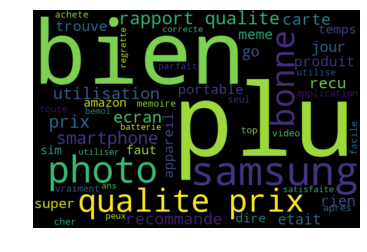

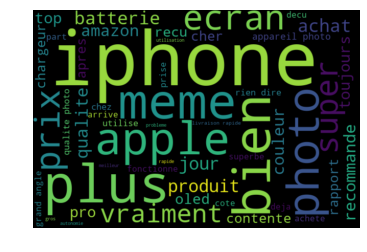

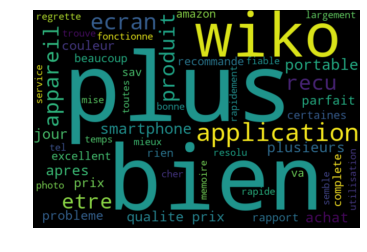

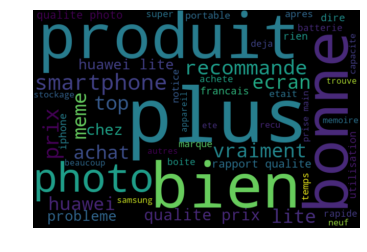

In [248]:
ImageWordCloud(s) 
ImageWordCloud(a)
ImageWordCloud(w) 
ImageWordCloud(h)